# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import most recent database

In [2]:
path = r'C:\Users\ZenBook\Instacart Basket Analysis_30.09.2025'

In [3]:
df_ords_prods_merge_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_merge_custs.pkl'))

In [4]:
# check shape
df_ords_prods_merge_custs.shape

(32406041, 32)

In [5]:
# check columns
df_ords_prods_merge_custs.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,spending_flag,regul_used_median,regul_user_median,order_frequency_flag,gender,age,date_joined,n_dependants,status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Low spender,8.0,8.0,Frequent customer,Male,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Low spender,8.0,8.0,Frequent customer,Male,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Low spender,8.0,8.0,Frequent customer,Female,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,...,Low spender,9.0,9.0,Frequent customer,Female,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,Low spender,9.0,9.0,Frequent customer,Female,40,2/9/2020,3,married,31308


# You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

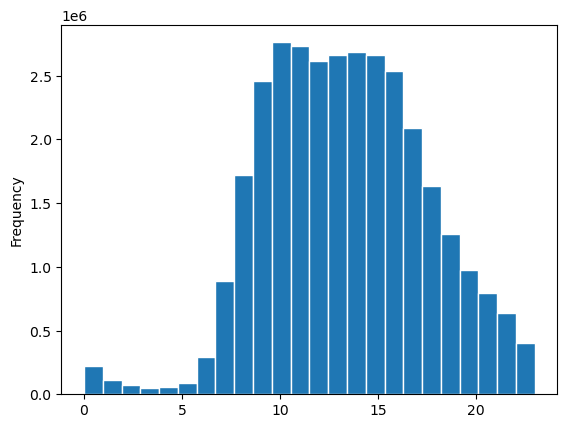

In [6]:
#creating histogram based on “order_hour_of_day”
hist = df_ords_prods_merge_custs['order_hour_of_day'].plot.hist(bins = 24, edgecolor='white')

The histogram indicates that order activity is very low between midnight and 5 a.m. Starting around 6 a.m., volume rises sharply, 
peaking between 8 and 10 a.m. From 10 a.m. to 3 p.m., order counts remain consistently elevated before tapering off noticeably after 5–6 p.m. In summary, the data show that customer ordering behavior is concentrated in the late morning and early afternoon, with minimal engagement during nighttime hours.

# The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [7]:
df_ords_prods_merge_custs.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spend_by_user_avg', 'spending_flag', 'regul_used_median',
       'regul_user_median', 'order_frequency_flag', 'gender', 'age',
       'date_joined', 'n_dependants', 'status', 'income'],
      dtype='object')

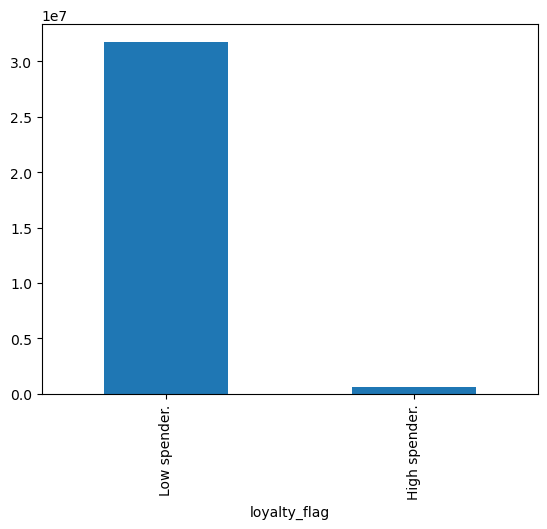

In [8]:
# creating bar chart based on "loyalty_flag" column of the df_ords_prods_merge_custs dataframe

bar = df_ords_prods_merge_custs['loyalty_flag'].value_counts().plot.bar()

In [9]:
#check the values of Low and High spenders
df_ords_prods_merge_custs.value_counts('loyalty_flag')

loyalty_flag
Low spender.     31771789
High spender.      634252
Name: count, dtype: int64

# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

For saving memory, I select only "order_hour_of_day", "prices", "age", "n_dependants", "income"

In [11]:
df_prices_of_hour = df_ords_prods_merge_custs[["order_hour_of_day", "prices", "age", "n_dependants", "income"]]

In [12]:
df_prices_of_hour.shape

(32406041, 5)

In [13]:
df_prices_of_hour.head()

,order_hour_of_day,prices,age,n_dependants,income
0,11,5.8,81,1,49620
1,17,5.8,81,1,49620
2,21,5.8,66,2,158302
3,13,5.8,40,3,31308
4,17,5.8,40,3,31308


In [14]:
# сreating a random sample 
np.random.seed(4)

In [15]:
# producing a list of True/False values to the test np.random.rand()<=0.7
dev = np.random.rand(len(df_prices_of_hour)) <= 0.7

In [16]:
# storing 70% of the sample in the data frame big
big = df_prices_of_hour[dev]

In [17]:
#store 30% or the sample in the dataframe small
small = df_prices_of_hour [~dev]

In [18]:
# checking
len(df_prices_of_hour)

32406041

In [19]:
len(big) + len(small)

32406041

In [20]:
# check dataframe
df_prices_of_hour

,order_hour_of_day,prices,age,n_dependants,income
0,11,5.8,81,1,49620
1,17,5.8,81,1,49620
2,21,5.8,66,2,158302
3,13,5.8,40,3,31308
4,17,5.8,40,3,31308
...,...,...,...,...,...
32406036,9,13.5,47,1,166687
32406037,11,13.5,25,0,53936
32406038,8,13.5,57,1,100649
32406039,15,13.5,57,1,100649


In [21]:
# creating a new dataframe that contains only the "prices" and "order_hour_of_day" columns from small subset
df_2 = small[['order_hour_of_day','prices']]

In [22]:
#checking new dataframe
df_2

,order_hour_of_day,prices
0,11,5.8
2,21,5.8
3,13,5.8
6,14,5.8
10,11,5.8
...,...,...
32406021,21,13.5
32406027,10,13.5
32406032,11,13.5
32406033,4,13.5


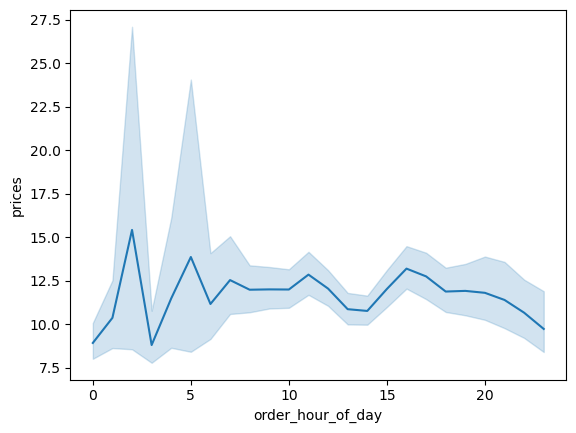

In [23]:
# line chart generation
line_2 = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

# Conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents: In a markdown cell beneath your line chart, describe what the line chart shows.

In [24]:
# creation new dataframe with "age" and "number_of_dependants" columns from small subset
df_3 = small[['age','n_dependants']]

In [25]:
# check
df_3

,age,n_dependants
0,81,1
2,66,2
3,40,3
6,20,3
10,61,1
...,...,...
32406021,52,2
32406027,81,2
32406032,29,1
32406033,20,2


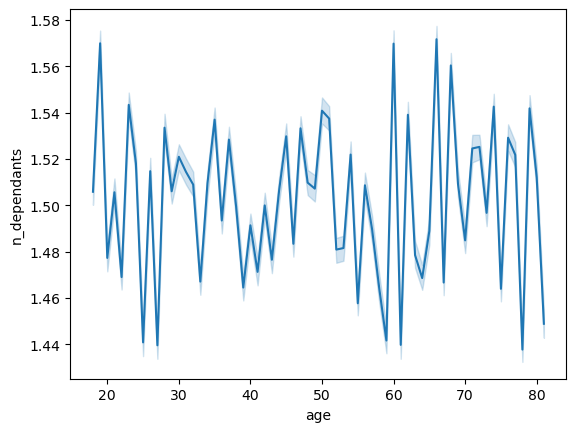

In [26]:
# creating the line chart
line_3 = sns.lineplot(data = df_3, x = 'age',y = 'n_dependants')

The chart plots age on the x-axis and number of dependants on the y-axis. Across all age groups—from late teens to 80s—the average number of dependants remains consistently between 1.5 and 1.56. This stability suggests that age has little influence on the number of dependants, with most individuals having one to two dependants regardless of age.

# Explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [27]:
# creation dataframe that contains "age" and "income" columns from small subset 
df_4 = small[['age','income']]

In [28]:
df_4

,age,income
0,81,49620
2,66,158302
3,40,31308
6,20,34171
10,61,42573
...,...,...
32406021,52,125863
32406027,81,103440
32406032,29,91643
32406033,20,27577


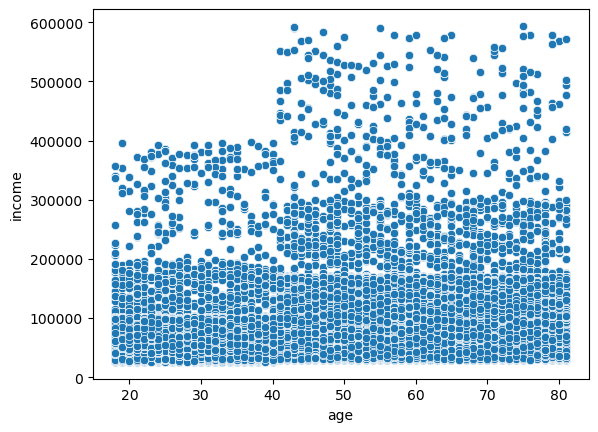

In [29]:
# creation a scatterplot
scatterplot = sns.scatterplot(data = df_4, x = 'age', y = 'income')

The scatterplot displays the relationship between age (x-axis) and income (y-axis) for individuals in the dataset. Most data points are densely clustered at lower income levels, especially below 150,000, across a wide age range—from early 20s to late 70s. While there are some outliers with significantly higher incomes, they are relatively rare and scattered.
Overall, the plot suggests that income does not increase consistently with age. There’s no clear upward or downward trend, indicating a weak or non-linear correlation between age and income in this dataset. Most individuals, regardless of age, tend to fall within a similar income bracket.

In [32]:
# exporting histogram
hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [34]:
# exporting bar chart
bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [36]:
# export Line 2 chart - the “prices” vs. "hour_of_the_day"
line_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_chart_prices_vs_hours_of_day.png'))

In [38]:
# export Line 3 chart -  age vs. number of dependents
line_3.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'line_chart_age_vs_n_dependents.png'))

In [39]:
# export scatterplot - age vs. income
scatterplot.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'scatterplot_age_vs_income.png'))